In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading our data
data = pd.read_excel("C:/Users/Faith/Downloads/Tech job salaries ediuted (Autosaved) (1).xlsx")
data.head(5)

,work_year,Experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,Company_size
0,2020,Middle level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior level,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior level,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Middle level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior level,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [3]:
#Checking for the data types
data.dtypes

work_year              int64
Experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
Company_size          object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   Experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  Company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 48.7+ KB


In [5]:
#Checking for summary statistis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,565.0,2021.364602,6.981384e-01,2020.0,2021.0,2021.0,2022.0,2022.0
salary,565.0,338115.985841,1.599879e+06,4000.0,67000.0,110925.0,165000.0,30400000.0
salary_in_usd,565.0,110610.343363,7.228070e+04,2859.0,60757.0,100000.0,150000.0,600000.0
remote_ratio,565.0,69.911504,4.090067e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
#Checking for duplicates
data.duplicated().sum()

0

In [7]:
#Checking for missing values
data.isnull().sum()

work_year             0
Experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
Company_size          0
dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
#Our columns
data.columns

Index(['work_year', 'Experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'Company_size'],
      dtype='object')

a) Analyse the salary trends across different job titles and experience levels.

In [9]:
salary_trends = data.groupby(['job_title', 'Experience_level'])['salary_in_usd'].mean().reset_index()

# Print the salary trends
print(salary_trends)

                         job_title Experience_level  salary_in_usd
0    3D Computer Vision Researcher     Middle level    5409.000000
1                     AI Scientist      Entry level   21987.250000
2                     AI Scientist     Middle level  160000.000000
3                     AI Scientist     Senior level   55000.000000
4               Analytics Engineer        Executive  155000.000000
..                             ...              ...            ...
100           Product Data Analyst     Middle level   13036.000000
101             Research Scientist      Entry level   86132.000000
102             Research Scientist     Middle level  136498.142857
103             Research Scientist     Senior level   88859.400000
104           Staff Data Scientist     Senior level  105000.000000

[105 rows x 3 columns]


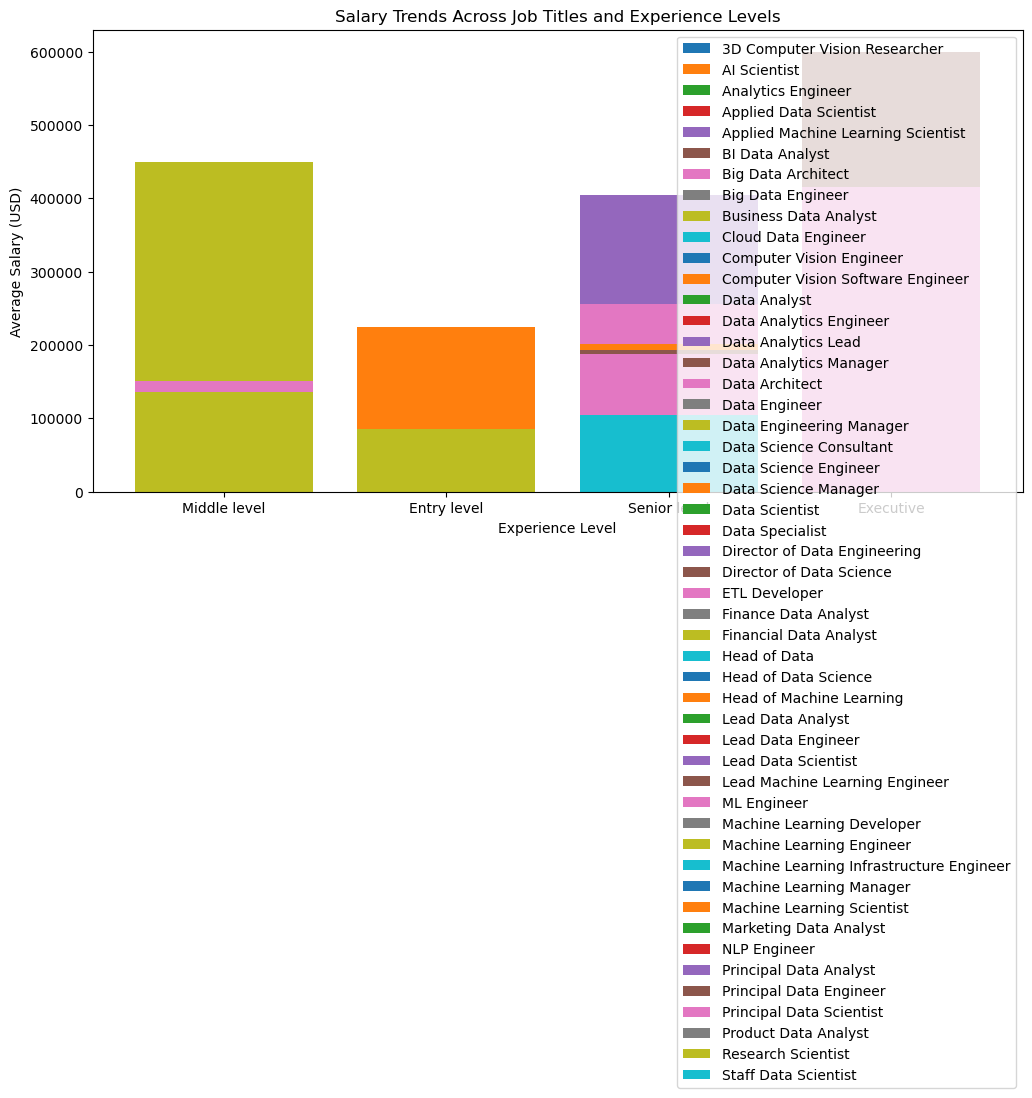

In [10]:
# Create a bar plot to visualize salary trends
plt.figure(figsize=(12, 6))
for job_title, group in salary_trends.groupby('job_title'):
    plt.bar(group['Experience_level'], group['salary_in_usd'], label=job_title)

plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Salary Trends Across Job Titles and Experience Levels')
plt.legend()
plt.show()


b) Investigate the impact of remote work on compensation

In [11]:
# Filter out rows where remote_ratio is not null and salary_in_usd is not null
df_filtered = data.dropna(subset=['remote_ratio', 'salary_in_usd'])

# Split the dataset into remote and non-remote workers based on remote_ratio
remote_workers = df_filtered[df_filtered['remote_ratio'] > 0]
non_remote_workers = df_filtered[df_filtered['remote_ratio'] == 0]

# Calculate the average salary for remote and non-remote workers
avg_salary_remote = remote_workers['salary_in_usd'].mean()
avg_salary_non_remote = non_remote_workers['salary_in_usd'].mean()

#Printing the average salaries
print("Average Salary for Remote Workers: $", round(avg_salary_remote, 2))
print("Average Salary for Non-Remote Workers: $", round(avg_salary_non_remote, 2))

Average Salary for Remote Workers: $ 111925.25
Average Salary for Non-Remote Workers: $ 105785.4


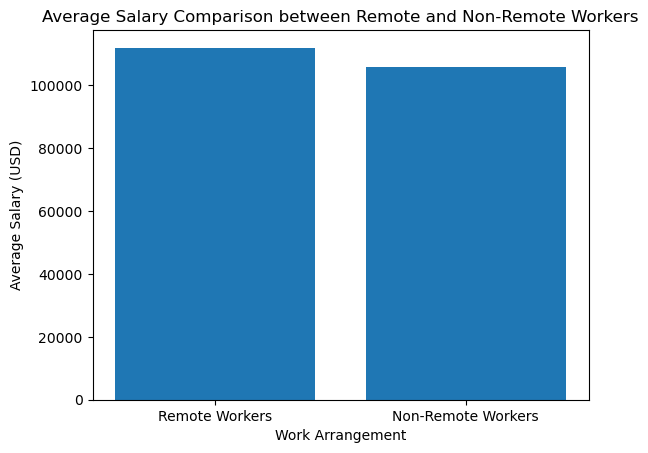

In [12]:
# Plot the average salaries
plt.bar(['Remote Workers', 'Non-Remote Workers'], [avg_salary_remote, avg_salary_non_remote])
plt.xlabel('Work Arrangement')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary Comparison between Remote and Non-Remote Workers')
plt.show()

c) Compare salary levels between full time and part time employment

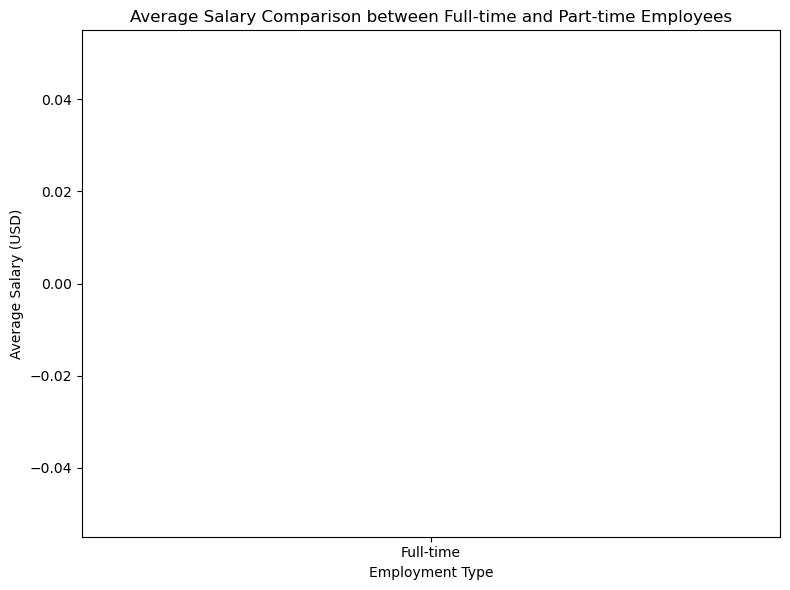

In [15]:
# Split the dataset into full-time and part-time employees based on employment_type
full_time_employees = df_filtered[df_filtered['employment_type'] == 'Full-time']
part_time_employees = df_filtered[df_filtered['employment_type'] == 'Part-time']

# Calculate the average salary for full-time and part-time employees
avg_salary_full_time = full_time_employees['salary_in_usd'].mean()
avg_salary_part_time = part_time_employees['salary_in_usd'].mean()

# Plot the average salaries
plt.figure(figsize=(8, 6)) 
plt.bar(['Full-time', 'Part-time'], [avg_salary_full_time, avg_salary_part_time], color=['blue', 'orange']) 
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary Comparison between Full-time and Part-time Employees')
plt.tight_layout()  
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


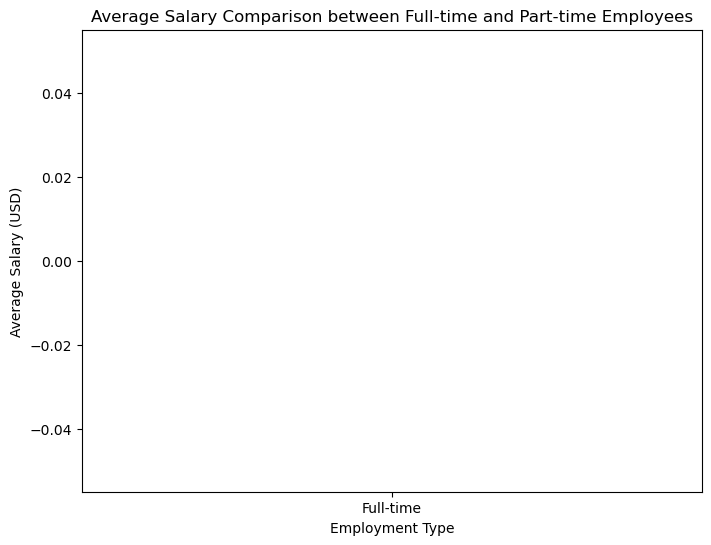

In [16]:
df_filtered = data.dropna(subset=['salary_in_usd'])

# Split the dataset into full-time and part-time employees based on employment_type
full_time_employees = df_filtered[df_filtered['employment_type'] == 'Full-time']
part_time_employees = df_filtered[df_filtered['employment_type'] == 'Part-time']

# Calculate the average salary for full-time and part-time employees
avg_salary_full_time = full_time_employees['salary_in_usd'].mean()
avg_salary_part_time = part_time_employees['salary_in_usd'].mean()

# Plot the average salaries
plt.figure(figsize=(8, 6))
employment_types = ['Full-time', 'Part-time']
average_salaries = [avg_salary_full_time, avg_salary_part_time]
plt.bar(employment_types, average_salaries, color=['blue', 'orange'])

# Add labels to the bars
for i in range(len(employment_types)):
    plt.text(employment_types[i], average_salaries[i], f'${average_salaries[i]:.2f}', ha='center', va='bottom')

plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary Comparison between Full-time and Part-time Employees')
plt.show()


d) Understand the correlation between company size and employee salary. 

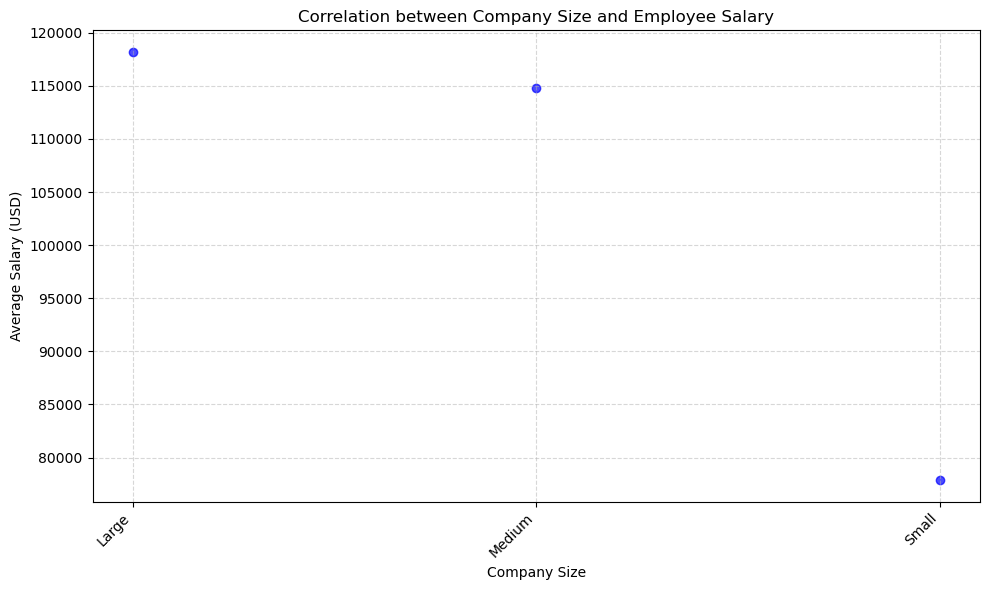

In [18]:
# Drop rows with missing values in 'salary_in_usd' and 'company_size' columns
df_cleaned = data.dropna(subset=['salary_in_usd', 'Company_size'])

# Group the data by 'company_size' and calculate the average salary for each group
avg_salary_by_company_size = df_cleaned.groupby('Company_size')['salary_in_usd'].mean()

# Convert the grouped data to a DataFrame for easier plotting
avg_salary_by_company_size = avg_salary_by_company_size.reset_index()

# Plotting the correlation between company size and average salary
plt.figure(figsize=(10, 6))
plt.scatter(avg_salary_by_company_size['Company_size'], avg_salary_by_company_size['salary_in_usd'], color='blue', alpha=0.7)
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Correlation between Company Size and Employee Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


e) Predictive analysis for forecasting salaries based on experience and title

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.get_dummies(data, columns=['Experience_level', 'job_title'], drop_first=True)

# Select features and target variable
X = data.drop(columns=['salary'])
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Example salary prediction for a new employee
new_employee_data = {
    'work_year': [4],
    'Experience_level_Intermediate': [1],
    'Experience_level_Senior': [0],
    'job_title_Manager': [1],
    'job_title_Engineer': [0]
    # Add other columns as needed
}

new_employee_df = pd.DataFrame(new_employee_data)
predicted_salary = model.predict(new_employee_df)

print(f'Predicted salary for the new employee: ${predicted_salary[0]:.2f}')


ValueError: could not convert string to float: 'Full-Time'